# 実習08-2 CSVファイル読み込みとモデルの検討（keras）
---
今回は、sklearnで実施していた時と同様に、
学習用データとしてCSVファイルを読み込んで使用する。

また、kerasを使用した場合は、基本的にはMLPのモデルを作成するが、可能であれば様々な構成（ノード数や層の数など）の中から、精度の高そうなものを選択した方がよい。
さらに、学習時の誤差や精度をグラフ化することにより、より予測精度の高いモデルの選択を目指す。

今回の実習では、分類問題と回帰問題のそれぞれについて、次の手順でアルゴリズムとパラメータの選択を行う。

0.  実行したいタスクと学習分類の確認
1.   学習用データをCSVファイルから読み込み、データを準備する。
2.   モデルを作成し、訓練用データに対する精度とテスト用データに対する精度を確認する。
3.   確認した精度から、現在のモデルの改善方法を検討する。
4.   2から4を繰り返し、最終的なモデルを決定する。
5. モデルを保存する



## 1. 分類問題
### 1-0. 実行したいタスクと学習分類の確認

ここでは、ワインの情報（アルコール度数や色の濃さなど13項目）から、ワインの種類（class_0、class_1、class_2）がどれかを予測するAIを作成する。使用するデータセットに予測すべき値が含まれており、予測は3つのうちどれかに分類するため、学習分類は

* 教師あり学習
* 分類（多値分類）

である。

### 1-1. データセットの準備
#### 1-1-1. CSVファイルのアップロードと読み込み
分類問題には、配布するワインのデータセット（wine.csv）を使用し、
CSVファイルの読み込みには、pandasモジュールのread_csv()を使用する。

```
←まず、CSVファイルを開いて中身を確認し、Google Colabにファイルをアップロードする。
```

```
# アップロード後
import pandas as pd
df_wine = pd.read_csv('ファイル名')
```


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
# CSVファイルの読み込み
import pandas as pd
df_wine = pd.read_csv('/content/drive/MyDrive/第08週_ディープラーニングとKeras/wine.csv')

# 表示して確認してもよい
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,class_0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,class_0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,class_0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,class_0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,class_2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,class_2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,class_2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,class_2


#### 1-1-2. 入力データと出力データの作成
入力データとして、最初の13列（最後の「class」以外）を使用する。
```
# 入力データに使用する列を抽出（最初の13列にする、最後の1列を削除）
変数名 = df_wine.iloc[:,a:b] # 行は全て、列はa列目からb-1列目までにする
または
変数名 = df_wine.drop('削除する列名', axis=1) # 列の場合はaxis=1
など

```

In [39]:
# 入力データに使用する列を抽出する(最初の13列を取るか、最後の1列を削除)
x = df_wine.iloc[:,:-1]
# 表示して確認してもよい
x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


出力に必要な列のみ抽出して出力データyを作成する。
```
#抽出（1列なので列名を指定可能）
y = df_wine['列名']

```

In [40]:
# 抽出
y = df_wine['class']
# 表示して確認してもよい
y

,class
0,class_0
1,class_0
2,class_0
3,class_0
4,class_0
...,...
173,class_2
174,class_2
175,class_2
176,class_2


出力データがカテゴリ名（class_0、class_1、class_2）になっているが、Kerasでは、このまま使用することが難しいため、one hot encodingを使用して[1, 0, 0]、[0, 1, 0]、[0, 0, 1]と表現する。

今回は、pandasのget_dummiesを使用する。
```
# カテゴリ名をone hot encoding
y_enc = pd.get_dummies(y, dtype=int)
```

In [41]:
# カテゴリ名をone hot encoding（数値にするならdtype指定、指定しなくても学習は可能）
y_enc = pd.get_dummies(y, dtype=int)

In [42]:
# 表示して確認してもよい
y_enc

,class_0,class_1,class_2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
173,0,0,1
174,0,0,1
175,0,0,1
176,0,0,1


### 1-1-3. 訓練用とテスト用に分ける
入力データXと出力データy_encができたら、訓練用データとテストデータに分割する。train_test_split()を使用する。

**random_stateには学籍番号を入れてください**
```
# インポート
from sklearn.model_selection import train_test_split
# 訓練用データセットとテスト用データセットへの分割（訓練用80%、テスト用20%）、y_encの割合に応じた分割（stratify=y_enc）
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=学籍番号, stratify=y_enc)
```

In [43]:
# データセットを分割する関数の読み込み
from sklearn.model_selection import train_test_split
# 訓練用データセットとテスト用データセットへの分割（訓練用80%、テスト用20%）、y_encの割合に応じた分割（stratify=y_enc）
x_train, x_test, y_train, y_test = train_test_split(x, y_enc, test_size=0.2, random_state=2220042, stratify=y_enc)

x_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045
102,12.34,2.45,2.46,21.0,98,2.56,2.11,0.34,1.31,2.80,0.80,3.38,438
90,12.08,1.83,2.32,18.5,81,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480
101,12.60,1.34,1.90,18.5,88,1.45,1.36,0.29,1.35,2.45,1.04,2.77,562
94,11.62,1.99,2.28,18.0,98,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,11.82,1.72,1.88,19.5,86,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415
26,13.39,1.77,2.62,16.1,93,2.85,2.94,0.34,1.45,4.80,0.92,3.22,1195
52,13.82,1.75,2.42,14.0,111,3.88,3.74,0.32,1.87,7.05,1.01,3.26,1190
112,11.76,2.68,2.92,20.0,103,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607


### 1-2. モデルの作成、学習、精度の確認
#### 1-2-1. モデルの作成
とりあえず、中間層1層のみの簡単なモデルを作成し手順を確認する。
以下の点に注意すること。


*   入力層で指定する入力ノード数は**[　11　]**
*   出力層のノード数は**[　50　]**
*   多値分類のため、出力層の活性化関数は**[　softmax　]**<br>
   （linear、sigmoid、softmaxのうちどれか）

```
# インポートする
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense

# モデルを用意する（中間層はとりあえず）
clf = keras.Sequential([
  Input(shape=(入力ノード数,)),
  Dense(64, activation='relu'),
  Dense(出力ノード数, activation='活性化関数')
])
# サマリの表示
clf.summary()
```


In [47]:
# インポートする
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense

# モデルを用意する（中間層はとりあえず）
clf = keras.Sequential([
  Input(shape=(13,)),
  Dense(50, activation='relu'),
  Dense(3, activation='softmax')
])
# サマリの表示
clf.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 50)                  │             700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 3)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 853 (3.33 KB)

 Trainable params: 853 (3.33 KB)

 Non-trainable params: 0 (0.00 B)

#### 1-2-2. モデルのコンパイル
コンパイルし、モデルを学習できるようにする。
多値分類（出力はone hot encoding済）のため、損失関数はcategorical_crossentropyを指定する。
```
# コンパイル
clf.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
```

In [48]:
# コンパイル
clf.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#### 1-2-3. モデルの学習
fitを使用して学習する。この際、validation_dataに検証用（テスト用）データを指定しておけば、各エポックの最後に検証用データでlossとmetricを計算してくれる。

後でグラフ化するため、fitの戻り値を変数に入れておく。

```
# エポック数はとりあえず
hist_clf = clf.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)
```


In [49]:
# fitで学習
hist_clf = clf.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.3078 - loss: 148.1954 - val_accuracy: 0.3333 - val_loss: 146.8304
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3603 - loss: 120.6451 - val_accuracy: 0.3333 - val_loss: 121.7614
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3312 - loss: 101.4267 - val_accuracy: 0.3333 - val_loss: 96.5515
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3265 - loss: 79.9228 - val_accuracy: 0.3333 - val_loss: 71.4526
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3143 - loss: 58.0600 - val_accuracy: 0.3333 - val_loss: 46.4345
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3569 - loss: 30.4595 - val_accuracy: 0.2778 - val_loss: 30.5872
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2928 - loss: 25.2017 - val_accuracy: 0.2778 - val_loss: 24.8464
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3229 - loss: 15.4263 - val_accuracy: 0.3

#### 1-2-3. グラフの確認
後半の回帰問題でも使用できるように、グラフの描画を関数化しておこう。

```
# plot_graph(hist_clf, 'accuracy')などでグラフを描画できるようにする。
↓下のコードセルを実行してください
```

In [50]:
import matplotlib.pyplot as plt

# 後のために、グラフを表示する関数を作成しておく
def plot_graphs(hist, metric):

  # ----------------------------
  # 各epochでの誤差と精度を取得
  # ----------------------------
  met      = hist.history[     metric ]
  val_met  = hist.history[ 'val_'+metric ]
  loss     = hist.history[    'loss' ]
  val_loss = hist.history['val_loss' ]

  epochs   = range(len(met)) # Get number of epochs

  # ---------------------------------------------
  # エポック数に対する誤差を表示（片対数グラフ）
  # --------------------------------------------
  plt.plot  ( epochs,     loss, label='loss')
  plt.plot  ( epochs, val_loss, label='val_loss')
  plt.title ('Training and validation loss'   )
  plt.legend()
  plt.yscale('log')
  plt.figure()
  plt.show()

  # ------------------------------------------------
  # エポック数に対する精度を表示
  # ------------------------------------------------
  plt.plot  ( epochs,     met, label='met' )
  plt.plot  ( epochs, val_met, label='val_met')
  plt.title ('Training and validation metric value')
  plt.legend()
  plt.figure()
  plt.show()

作成した関数を利用して、グラフを作成する。

```
# fitの戻り値（hist）を渡してグラフを描く。metricはaccuracy
plot_graphs(hist_clf, 'accuracy')
```

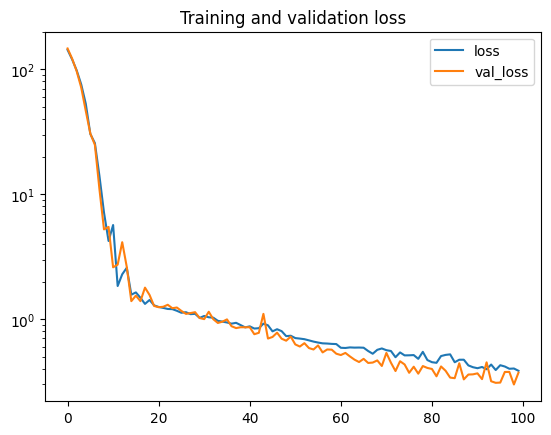

<Figure size 640x480 with 0 Axes>

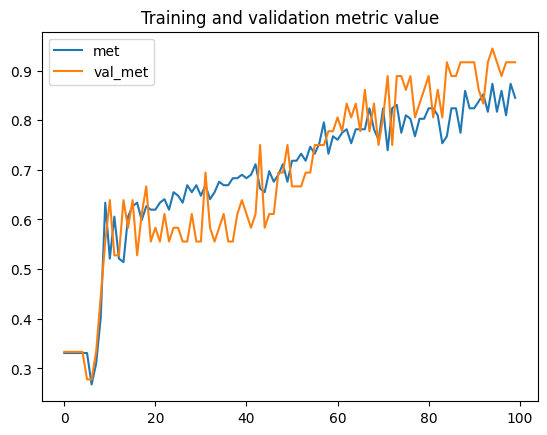

<Figure size 640x480 with 0 Axes>

In [51]:
# fitの戻り値（hist）を渡してグラフを描く
plot_graphs(hist_clf, 'accuracy')

### 1-3. モデルの改善方法を検討
結果から、モデルの改善方法を検討する。例をいくつか示す。

*   訓練用、検証用ともにlossが下がりきっていない<br/>
    → 学習回数不足のため、epoch数を増やす
*   lossは下がりきっているが、精度が低い<br/>
    → モデルの複雑さが足りないため、モデルを複雑にする（ノード数や層を増やす）
*   訓練用に比べ、検証用のlossが大幅に高い<br>
    → 過学習のため、モデルを簡単にしたり、過学習を避ける仕組み（Dropoutや正則化、BatchNormarization）を入れたりする。
*   検証用のlossが増加している<br>
    → 過学習のため、epoch数を減らす



### 1-4. モデルの検討と決定
検討した改善方法を元に、モデルを再検討し、モデルの作成、学習、検証を繰り返す。

**今回はデータ数が少なく、グラフが安定しないため、方針が立てにくいと思います。変更の根拠は明確でなくても構いません。<br/>
可能なら正解率90%以上を目指してみましょう。**

In [54]:
# モデル作成とコンパイル
# 例えば層を増やす
clf2 = keras.Sequential()
clf2.add(Input(shape=(13,),)),
clf2.add(Dense(100, activation='relu'))
clf2.add(Dense(50, activation='relu'))
clf2.add(Dense(3, activation='softmax'))

# コンパイル
clf2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# サマリの表示
clf2.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 100)                 │           1,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 3)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,603 (25.79 KB)

 Trainable params: 6,603 (25.79 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# 学習
hist_clf2 = clf2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=300)

Epoch 1/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.3339 - loss: 90.3787 - val_accuracy: 0.3333 - val_loss: 53.5703
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3076 - loss: 41.7612 - val_accuracy: 0.3889 - val_loss: 32.6636
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3787 - loss: 24.8829 - val_accuracy: 0.3333 - val_loss: 11.0730
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3810 - loss: 9.6674 - val_accuracy: 0.3333 - val_loss: 8.1734
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2465 - loss: 8.7807 - val_accuracy: 0.6111 - val_loss: 3.3016
Epoch 6/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5205 - loss: 2.4948 - val_accuracy: 0.6111 - val_loss: 2.9235
Epoch 7/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5768 - loss: 3.5850 - val_accuracy: 0.6667 - val_loss: 2.9028
Epoch 8/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6482 - loss: 2.4637 - val_accuracy: 0.5278 - val_l

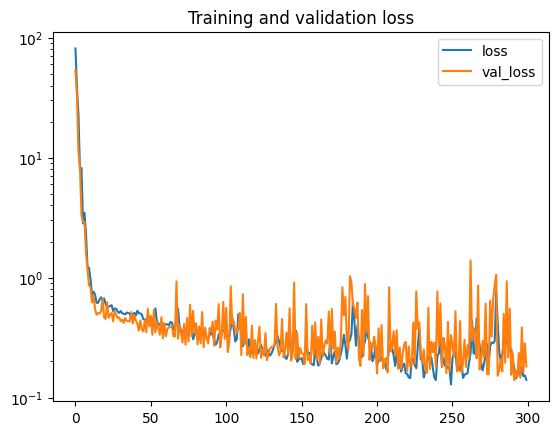

<Figure size 640x480 with 0 Axes>

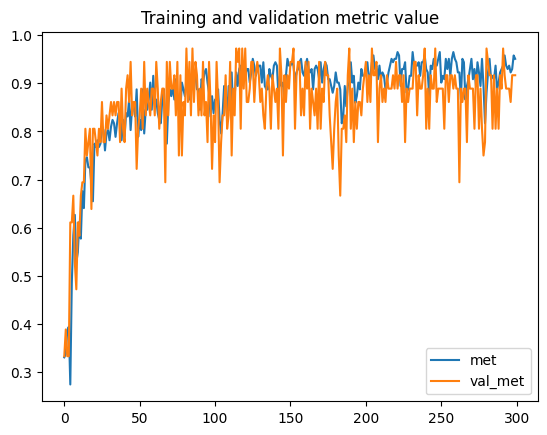

<Figure size 640x480 with 0 Axes>

In [56]:
# グラフで確認
# fitの戻り値（hist）を渡してグラフを描く
plot_graphs(hist_clf2, 'accuracy')

### 1-5. 最終的に作成したモデル

**最終的に作成したモデルについて、入力層から出力層まで順にノード数を書いてください。<br/>
[　6,603　]**


## 2.回帰問題
### 2-0. 実行したいタスクと学習分類の確認
ここでは、米国カリフォルニアの住環境の情報（築年数、部屋数など8項目）から、平均住宅価格を予測するAIを作成する。使用するデータセットに予測すべき値が含まれており、また、予測するのは数値であるため、学習分類は

* 教師あり学習
* 回帰

である。

### 2-1. データセットの準備

回帰問題には、配布するカリフォルニア住宅価格のデータセット（california.csv）を使用する。データを読み込んで学習用データを作成する。

*  最初の8列（MedHouseVal以外）が入力
*  最後の1列（MedHouseVal）が出力

※今回は出力が数値なので、そのまま使用する。（カテゴリ変数にしない）

In [57]:
# importは上で実施していれば不要

# CSVファイルの読み込み
import pandas as pd
df_California = pd.read_csv('/content/drive/MyDrive/第08週_ディープラーニングとKeras/california.csv')

# 表示して確認してもよい
df_California

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [58]:
# 入力データに使用する列を抽出する(最初の8列を取るか、最後の1列を削除)
x = df_California.iloc[:,:-1]
# 表示して確認してもよい
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [60]:
# 出力データに使用する列を抽出
y = df_California['MedHouseVal']
# 表示して確認してもよい
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


入力データXと出力データyができたら、訓練用データとテストデータに分割する。train_test_split()を使用する。

**random_stateには学籍番号を入れてください。**<br>
**回帰の場合は、stratifyを指定しない**
```
# インポート
from sklearn.model_selection import train_test_split
# 訓練用データセットとテスト用データセットへの分割（訓練用80%、テスト用20%）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=学籍番号)
```

In [61]:
# データセットを分割する関数の読み込み
from sklearn.model_selection import train_test_split
# 訓練用データセットとテスト用データセットへの分割（訓練用80%、テスト用20%）
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2220042)

### 2-2. モデルの作成、学習、精度の確認
#### 2-2-1. モデルの作成

とりあえず、中間層1層のみの簡単なモデルを作成し手順を確認する。
以下の点に注意すること。

*   input_shapeに記入する入力ノード数は**[　8　]**
*   出力層のノード数は**[　50　]**
*   回帰のため、出力層の活性化関数は**[　linear　]**<br>
   （linear、sigmoid、softmaxのどれか）

```
# インポートする
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense

# モデルを用意する
reg = keras.Sequential([
  Input(shape=(入力ノード数,)),
  Dense(中間ノード数, activation='relu'),
  Dense(出力ノード数, activation='出力活性化関数')
])
# サマリの表示
reg.summary()
```

In [62]:
# インポートする
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense

# モデルを用意する
reg = keras.Sequential([
  Input(shape=(8,)),
  Dense(50, activation='relu'),
  Dense(1, activation='linear')
])
# サマリの表示
reg.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 50)                  │             450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 501 (1.96 KB)

 Trainable params: 501 (1.96 KB)

 Non-trainable params: 0 (0.00 B)

#### 2-2-2. モデルのコンパイル
コンパイルし、モデルを学習できるようにする。
回帰問題のため、損失関数はmse、metricsはmaeを指定する。
```
# コンパイル
clf.compile(loss='mse',optimizer='adam',metrics=['mae'])
```

In [68]:
# コンパイル
reg.compile(loss='mse',optimizer='adam',metrics=['mae'])

#### 2-2-3. モデルの学習
fitを使用して学習する。この際、validation_dataに検証用（テスト用）データを指定しておけば、各エポックの最後に検証用データでlossとmetricを計算してくれる。

後でグラフ化するため、fitの戻り値を変数に入れておく。

```
hist_reg = reg.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)
```

In [69]:
# 学習
hist_reg = reg.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 54.8783 - mae: 3.3886 - val_loss: 0.7193 - val_mae: 0.6461
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8436 - mae: 0.6955 - val_loss: 0.6667 - val_mae: 0.5988
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1970 - mae: 0.7728 - val_loss: 1.2262 - val_mae: 0.9364
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2602 - mae: 0.9026 - val_loss: 0.9667 - val_mae: 0.7270
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4505 - mae: 0.7977 - val_loss: 4.3943 - val_mae: 1.4916
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6971 - mae: 1.0150 - val_loss: 0.7385 - val_mae: 0.6193
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5447 - mae: 0.9829 - val_loss: 0.6763 - val_mae: 0.6112
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1222 - mae: 0.7282 - val_loss: 0.6743 - val_mae: 0.5926
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms

作成した関数を利用して、グラフを作成する。

```
# fitの戻り値（hist）を渡してグラフを描く。metricはmae
plot_graphs(hist_reg, 'mae')
```

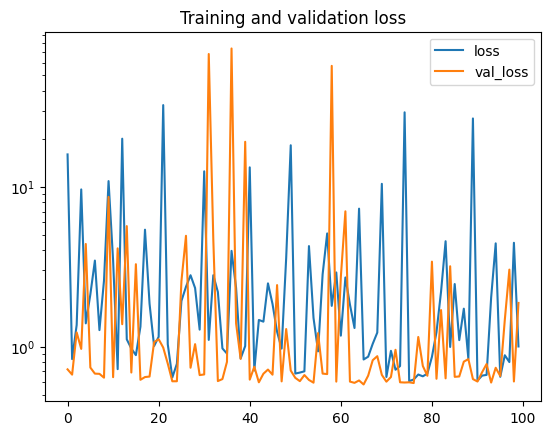

<Figure size 640x480 with 0 Axes>

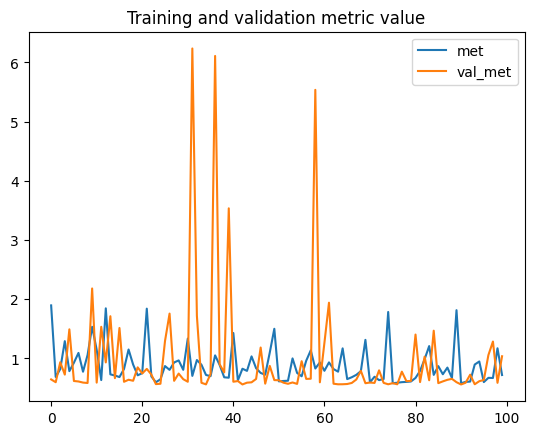

<Figure size 640x480 with 0 Axes>

In [70]:
# fitの戻り値（hist）を渡してグラフを描く。metricはmae
plot_graphs(hist_reg, 'mae')

### 2-4. モデルの検討と決定
検討した改善方法を元に、モデルを再検討し、モデルの作成、学習、検証を繰り返す。

**今回はデータ数が少なく、グラフが安定しないため、方針が立てにくいと思います。変更の根拠は明確でなくても構いません。<br/>
可能ならmae0.5以下を目指してみましょう。**

In [71]:
# モデルの作成、コンパイル
# モデルを用意する
reg2 = keras.Sequential()
reg2.add(Input(shape=(8,),)),
reg2.add(Dense(20, activation='relu'))
reg2.add(Dense(1, activation='linear'))

# コンパイル
reg2.compile(loss='mse',optimizer= 'adam',metrics=['mae'])

# サマリの表示
reg2.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 20)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201 (804.00 B)

 Trainable params: 201 (804.00 B)

 Non-trainable params: 0 (0.00 B)

In [72]:
# モデルの学習
hist_reg2 = reg2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=300)

Epoch 1/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13781.7256 - mae: 48.6076 - val_loss: 5.7216 - val_mae: 1.5559
Epoch 2/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22.3534 - mae: 1.6361 - val_loss: 6.4742 - val_mae: 1.8858
Epoch 3/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25.4298 - mae: 1.4134 - val_loss: 15.9027 - val_mae: 3.7007
Epoch 4/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.2560 - mae: 1.4042 - val_loss: 1.4934 - val_mae: 0.7916
Epoch 5/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18.3189 - mae: 1.3681 - val_loss: 1.4276 - val_mae: 0.8593
Epoch 6/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.7025 - mae: 1.1624 - val_loss: 0.9260 - val_mae: 0.6755
Epoch 7/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.1712 - mae: 0.7972 - val_loss: 0.8587 - val_mae: 0.6905
Epoch 8/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.6378 - mae: 0.7520 - val_loss: 0.7902 - val_mae: 0.6492
Epoch 9/300
516/516 ━━━━━━━━━━━━━━━━━━

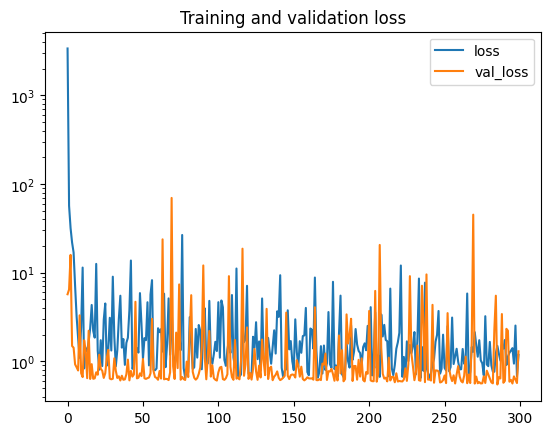

<Figure size 640x480 with 0 Axes>

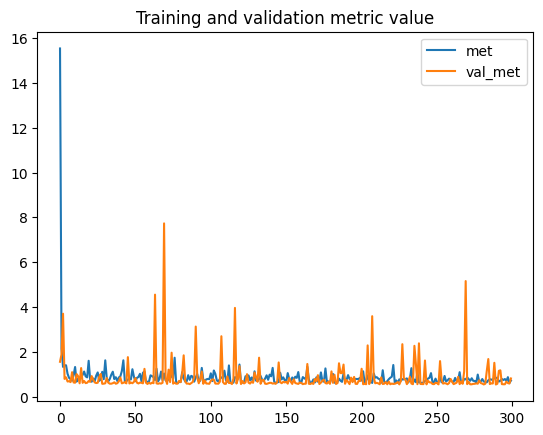

<Figure size 640x480 with 0 Axes>

In [73]:
# グラフで確認
plot_graphs(hist_reg2, 'mae')

### 2-5. 最終的に作成したモデル
**最終的に保存するモデルについて、入力層から出力層まで順にノード数を書いてください。<br/>
[　201　]**



## 提出物など

実習が終わったら、以下が記入されていることを教員にチェックしてもらうこと。

*   最終的に作成した分類問題のモデル構成
*   最終的に作成した回帰問題のモデル構成

このファイルをipynbでダウンロードして提出してください。（クラス番号氏名を自分のものに変更する）

